In [ ]:
#CHE1147 Assignment 3

# **1 Feature Engineering**

# **1.1 Import the data and create the anchor date columns**

In [7]:
#1. Import the dataset as txn and identify the number of rows.
import pandas as pd
import io
from google.colab import files

In [8]:
uploaded=files.upload()

Saving Retail_Data_Transactions.csv to Retail_Data_Transactions (1).csv


In [9]:
txn=pd.read_csv(io.BytesIO(uploaded.get('Retail_Data_Transactions.csv')))

In [10]:
txn.shape

(125000, 3)

Answer: The number of columns is 125000

In [11]:
#2. The date-format in column ’trans_date’ is not standard. Create a new column ’txn_date’
# from ’trans_date’ with pd.to datetime and drop the column ’trans_date’.

txn_date=pd.to_datetime(txn["trans_date"])

txn["txn_date"]=txn_date

txn=txn.drop(['trans_date'],axis=1)

txn

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20
...,...,...,...
124995,CS8433,64,2011-06-26
124996,CS7232,38,2014-08-19
124997,CS8731,42,2014-11-28
124998,CS8133,13,2013-12-14


In [13]:
#3. Identify the min() and max() of column ’txn date’.

min_value=min(txn["txn_date"])
max_value=max(txn["txn_date"])

print("The minimum value of column 'txn_date' is ",min_value)
print("The maximum value of column 'txn_date' is ",max_value)

The minimum value of column 'txn_date' is  2011-05-16 00:00:00
The maximum value of column 'txn_date' is  2015-03-16 00:00:00


In [14]:
#4. Create the column ’ME DT’: the last day of the month in the ’trans date’ column.
# DateOffset objects is a simple way to do this in pandas.

txn['ME_DT'] = txn['txn_date'] + pd.offsets.MonthEnd(n=0)
txn


,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30
...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30
124996,CS7232,38,2014-08-19,2014-08-31
124997,CS8731,42,2014-11-28,2014-11-30
124998,CS8133,13,2013-12-14,2013-12-31


In [15]:
#5. Create the column ’YEAR’: the year in the ’trans date’ column. DatetimeIndex with
# attribute .year will help you do so.

txn['YEAR'] = pd.DatetimeIndex(txn['txn_date']).year
txn.iloc[55:60]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-08-31,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011


# **1.2 Create features that capture annual spending**

In [16]:
#1. Using groupby and NamedAgg create clnt annual aggregations, the annual aggre-
#gations dataframe: with sum, mean, std, var, sem, max, min, count as the aggregation
#functions. A snapshot of the output table is shown below. Notice that the output is a
#typical MultiIndex pandas dataframe.

clnt_annual_aggregations = txn.groupby(["customer_id",'YEAR']).agg(
    ann_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),
    ann_txn_amt_ave = pd.NamedAgg('tran_amount','mean'),
    ann_txn_amt_std = pd.NamedAgg('tran_amount','std'),
    ann_txn_amt_var = pd.NamedAgg('tran_amount','var'),
    ann_txn_amt_sem = pd.NamedAgg('tran_amount','sem'),
    ann_txn_amt_max = pd.NamedAgg('tran_amount','max'),
    ann_txn_amt_min = pd.NamedAgg('tran_amount','min'),
    ann_txn_amt_cnt = pd.NamedAgg('tran_amount','count')    
)

clnt_annual_aggregations

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
...                           ...              ...              ...   
CS9000      2011               39        19.500000         4.949747   
            2012              216        54.000000        16.772994   
            2013              147        73.500000         3.535534   
            2014               97        24.250000         8.261356   
            2015               34        34.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
...                           ...              ...              ...   
CS9000      2011        24.500000         3.500000               23   
            2012       281.333333         8.386497               77   
            2013        12.500000         2.500000               76   
            2014        68.250000         4.130678               35   
            2015              NaN              NaN               34   

                  ann_txn_amt_min  ann_txn_amt_cnt  
customer_id YEAR                                    
CS1112      2011               56                3  
            2012               52                5  
            2013               36                3  
            2014               59                3  
            2015               39                1  
...                           ...              ...  
CS9000      2011               16                2  
            2012               37                4  
            2013               71                2  
            2014               16                4  
            2015               34                1  

[31140 rows x 8 columns]

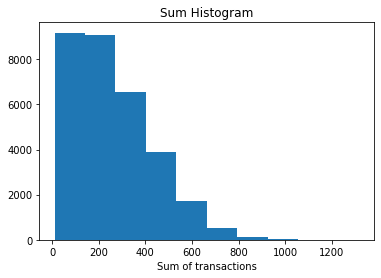

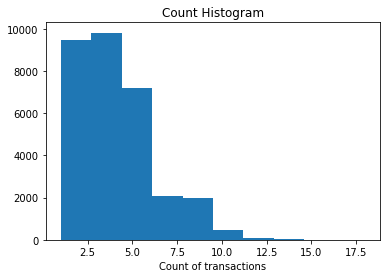

In [17]:
#2. Plot the histogram of the sum and count.

import matplotlib.pyplot as plt
#Sum histogram
plt.hist(clnt_annual_aggregations['ann_txn_amt_sum'])
plt.title("Sum Histogram")
plt.xlabel("Sum of transactions")
plt.show()

#Count histogram
plt.hist(clnt_annual_aggregations['ann_txn_amt_cnt'])
plt.title("Count Histogram")
plt.xlabel("Count of transactions")
plt.show()

In [18]:
#3. Reset the index and reshape the table with the pivot table function to create the
#clnt annual aggregations pivot table shown below with 40 columns (why 40?).
#You should expect columns with NaN values. Impute the NaN entries when you
#perform the pivot table function and explain your choice of values.

clnt_annual_aggregations_pivot = clnt_annual_aggregations.pivot_table(columns='YEAR',index='customer_id').fillna(0)
clnt_annual_aggregations_pivot

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   
...                     ...        ...        ...        ...        ...   
CS8996            31.000000  33.666667  41.500000  56.000000   0.000000   
CS8997            45.000000  39.500000  35.166667  42.000000   0.000000   
CS8998            64.000000  54.400000  47.000000  32.500000   0.000000   
CS8999            52.000000  25.250000  28.000000  21.000000   0.000000   
CS9000            19.500000  54.000000  73.500000  24.250000  34.000000   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum         \
YEAR                   2011 2012 2013 2014 2015  ...            2011   2012   
customer_id                                      ...                          
CS1112                  3.0  5.0  3.0  3.0  1.0  ...           212.0  337.0   
CS1113                  3.0  5.0  5.0  4.0  3.0  ...           244.0  374.0   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...           426.0  150.0   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...           261.0  473.0   
CS1116                  4.0  3.0  1.0  5.0  0.0  ...           235.0  230.0   
...                     ...  ...  ...  ...  ...  ...             ...    ...   
CS8996                  2.0  3.0  2.0  6.0  0.0  ...            62.0  101.0   
CS8997                  2.0  4.0  6.0  2.0  0.0  ...            90.0  158.0   
CS8998                  2.0  5.0  2.0  4.0  0.0  ...           128.0  272.0   
CS8999                  3.0  4.0  3.0  2.0  0.0  ...           156.0  101.0   
CS9000                  2.0  4.0  2.0  4.0  1.0  ...            39.0  216.0   

                                 ann_txn_amt_var                           \
YEAR          2013   2014   2015            2011        2012         2013   
customer_id                                                                 
CS1112       212.0  212.0   39.0      485.333333  161.800000  1190.333333   
CS1113       426.0  226.0  220.0      444.333333  290.200000   171.200000   
CS1114       352.0  425.0   79.0       94.700000  968.000000   619.300000   
CS1115       557.0  313.0   55.0      225.000000  477.285714   110.952381   
CS1116        59.0  333.0    0.0      449.583333  908.333333     0.000000   
...            ...    ...    ...             ...         ...          ...   
CS8996        83.0  336.0    0.0       98.000000   20.333333   144.500000   
CS8997       211.0   84.0    0.0        8.000000   45.666667   441.366667   
CS8998        94.0  130.0    0.0       50.000000  505.300000  1568.000000   
CS8999        84.0   42.0    0.0      333.000000   21.583333   103.000000   
CS9000       147.0   97.0   34.0       24.500000  281.333333    12.500000   

                                     
YEAR               2014        2015  
customer_id                          
CS1112       284.333333    0.000000  
CS1113       781.666667  745.333333  
CS1114       726.166667    0.000000  
CS1115       512.250000    0.000000  
CS1116       636.800000    0.000000  
...                 ...         ...  
CS8996       481.600000    0.000000  
CS8997        18.000000    0.000000  
CS8998       219.666667    0.000000  
CS8999        18.000000    0.000000  
CS9000        68.250000    0.000000  

[6889 rows x 40 columns]

Answer: The number of columns is 40 because we have 8 metrics (sum, mean, std, var, sem, max, min, count) and 5 years (2011-2015) for each customer as the index.

I chose to inpute the missing values with 0 because if we are missing data from the clients' transaction we can assume that the client did not make any transaction at that time.

In [20]:
#4. The pivoted object you created is a MultiIndex object with hierarchical indexes. You
#can see the first level (i.e. 0) in the snapshot above with names ’ann txn amt ave’,
#’ann txn amt max’ (and more as indicated by the ...) and the second level (i.e. 1)
#with names ’2011’, ’2012’, etc.

#You can confirm the multiple levels of the columns with the following two expressions.
#What are your observations regarding the number of levels and the column names?

clnt_annual_aggregations_pivot.columns.nlevels
clnt_annual_aggregations_pivot.columns

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt

Answer: From the two expressions I can see that there are two levels of columns and column names are None for first leverl and "YEAR" for second level.

In [21]:
#5. Finally, you want to save the dataframe clnt annual aggregations pivot as an
#.xlsx file for future use in the machine learning assignment. To do so, you want
#to remove the two levels in columns and create a single level with column names:
#’ann txn amt ave 2011’, ’ann txn amt ave 2012’, etc. To do so, use the code snippet
#below prior to saving the dataframe as an Excel file.

level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1

clnt_annual_aggregations_pivot

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3.0,5.0,3.0,3.0,1.0,...,212.0,337.0,212.0,212.0,39.0,485.333333,161.800000,1190.333333,284.333333,0.000000
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3.0,5.0,5.0,4.0,3.0,...,244.0,374.0,426.0,226.0,220.0,444.333333,290.200000,171.200000,781.666667,745.333333
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5.0,2.0,5.0,6.0,1.0,...,426.0,150.0,352.0,425.0,79.0,94.700000,968.000000,619.300000,726.166667,0.000000
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3.0,7.0,7.0,4.0,1.0,...,261.0,473.0,557.0,313.0,55.0,225.000000,477.285714,110.952381,512.250000,0.000000
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4.0,3.0,1.0,5.0,0.0,...,235.0,230.0,59.0,333.0,0.0,449.583333,908.333333,0.000000,636.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2.0,3.0,2.0,6.0,0.0,...,62.0,101.0,83.0,336.0,0.0,98.000000,20.333333,144.500000,481.600000,0.000000
CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2.0,4.0,6.0,2.0,0.0,...,90.0,158.0,211.0,84.0,0.0,8.000000,45.666667,441.366667,18.000000,0.000000
CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2.0,5.0,2.0,4.0,0.0,...,128.0,272.0,94.0,130.0,0.0,50.000000,505.300000,1568.000000,219.666667,0.000000


In [22]:
#Convert the clnt_annual_aggregations_pivot dataframe to an Excel file 
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")

In [23]:
#Download the excel file
from google.colab import files
files.download('annual_features.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Answer: The first two lines of expressions in the box are extracting the column names of level 0 and level 1, and the third line of expression is combining the names of two levels into one name.

In [ ]:
#6. What are the possible disadvantages in capturing client transaction behavior with the
#annual features described in this section (if any)?


Answer: In order to make some general conclusion for markert based on transaction data, the annual features may be too long as a period, as it may not contain useful trend information, maybe we can use seasonal features as products may vary depending on different seasons.

# **1.3 Create monthly aggregations**

In [24]:
#1. Create the dataframe that captures the monthly sum and count of transactions per client (name
#it clnt monthly aggregations). Use the groupby function with the Named Aggregation
#feature which was introduced in pandas version 0.25.0. Make sure that you name the columns
#as shown in the figure sample on the right.

clnt_monthly_aggregations = txn.groupby(["customer_id",'ME_DT']).agg(
    mth_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),
    mth_txn_cnt = pd.NamedAgg('tran_amount','count')    
)
clnt_monthly_aggregations

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
...                                 ...          ...
CS9000      2014-01-31               16            1
            2014-05-31               20            1
            2014-07-31               26            1
            2014-08-31               35            1
            2015-02-28               34            1

[103234 rows x 2 columns]

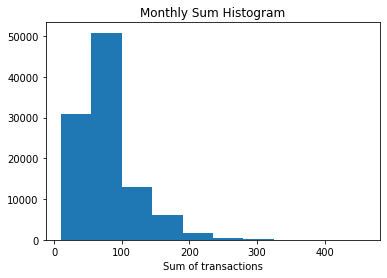

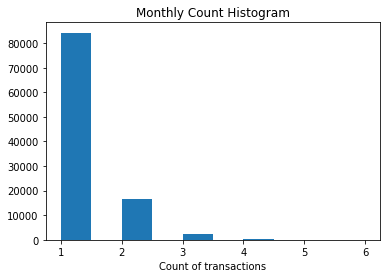

In [25]:
#2. Create a histogram of both columns you cre-ated. What are your observations? What are
#the most common and maximum values for eachcolumn? How do they compare with the ones
#in section 1.2?

#Monthly Sum histogram
plt.hist(clnt_monthly_aggregations['mth_txn_amt_sum'])
plt.title("Monthly Sum Histogram")
plt.xlabel("Sum of transactions")
plt.show()

#Monthly Count histogram
plt.hist(clnt_monthly_aggregations['mth_txn_cnt'])
plt.title("Monthly Count Histogram")
plt.xlabel("Count of transactions")
plt.show()

In [26]:
print('Most Common Value for monthly sum is:',clnt_monthly_aggregations['mth_txn_amt_sum'].mode()[0])
print('Maximum Value for monthly sum is:',clnt_monthly_aggregations['mth_txn_amt_sum'].max())
print('Most Common Value for monthly count is:',clnt_monthly_aggregations['mth_txn_cnt'].mode()[0])
print('Maximum Value for monthly count is:',clnt_monthly_aggregations['mth_txn_cnt'].max())

Most Common Value for monthly sum is: 77
Maximum Value for monthly sum is: 460
Most Common Value for monthly count is: 1
Maximum Value for monthly count is: 6


Answer:The most common value for monthly count is 1, which means that most of the customers make only 1 transction per month. Both the annual and monthly sum and count histograms are centered towards the left side and monthly sum and count values are smaller than annual values.

In [29]:
#Confirm with customer ID CS1112
clnt_monthly_aggregations.loc["CS1112",:]

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


# **1.4 Create the base table for the rolling window features**

In [31]:
#1. Create the numpy array of the unique elements in columns ’customer id’ and ’ME DT’
#of the txn table you created in section 1.1. Confirm that you have 6,889 unique clients
#and 47 unique month-end-dates.

clnt_no=txn['customer_id'].unique()
me_dt = txn['ME_DT'].unique()

#Confirm with the number of unique clients and number of unique months
print(len(clnt_no))
print(len(me_dt))

6889
47


In [32]:
#2.Use itertools.product to generate all the possible combinations of ’customer id’ and
#’ME DT’. Itertools is a Python module that iterates over data in a computation-
#ally efficient way. You can perform the same task with a for-loop, but the execution
#may be inefficient. For a brief overview of the Itertools module see here. If you
#named the numpy arrays with the unique elements: clnt no and me dt, then the
#code below will create an itertools.product object (you can confirm this by running:
#type(base table)).

from itertools import product

base_table = product(clnt_no , me_dt)

In [34]:
type(base_table)

itertools.product

In [35]:
#3. Next, you want to convert the itertools.product object base table into a pandas ob-
#ject called base table pd. To do so, use pd.DataFrame.from records and name the
#columns ’CLNT NO’ and ’ME DT’.

base_table_pd = pd.DataFrame.from_records(base_table)
base_table_pd.columns = ['CLNT_NO', 'ME_DT']

In [38]:
#4. Finally, you want to validate that you created the table you originally wanted. There
#are two checks you want to perform:

#Filter client CS1112 and confirm that the dates fall between the min and max
#month-dates you identified in section 1.1.

CS1112_pd=base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']

print("The minimum date of customer CS1112 is:",min(CS1112_pd['ME_DT']))
print("The maximum date of customer CS1112 is:",max(CS1112_pd['ME_DT']))
#Also, confirm that the snapshot of client CS1112 has 47 rows, one for each month in the dataset.

print(len(CS1112_pd))

The minimum date of customer CS1112 is: 2011-05-31 00:00:00
The maximum date of customer CS1112 is: 2015-03-31 00:00:00
47


In [39]:
#Confirm that the base table pd has 323,783 rows, which is the expected value
#of combinations for 6,889 unique clients and 47 unique month-end dates.

base_table_pd.shape

(323783, 2)

# **1.5 Create the monthly rolling window features**

In [40]:
#1. Left-join the base table pd with the clnt monthly aggregations table from section
#1.3 on [CLNT NO, ME DT] to create the table base clnt mth. Comment on the
#following questions in Markdown:

clnt_monthly_aggregations.index.set_names(['CLNT_NO','ME_DT'],inplace=True)
base_clnt_mth = base_table_pd.merge(clnt_monthly_aggregations, on = ['CLNT_NO', 'ME_DT'], how = 'left')
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN
...,...,...,...,...
323778,CS8077,2011-08-31,30.0,1.0
323779,CS8077,2012-09-30,NaN,NaN
323780,CS8077,2014-09-30,NaN,NaN
323781,CS8077,2014-02-28,NaN,NaN




*   Why do some rows have NaN values?

Because the **clnt_monthly_aggregations** table only captures the months with transactions of each client, with only 103234 rows, while **base_table_pd** covers all the possible combination of customers and 47 months, with 323783 rows, when taking left left-join, there will be rows with NaN values.

*   What values will you choose to impute NaN values in the sum and count columns? Perform the imputation you suggest.

I will still impute the NaN values with 0s to show that the customer does not make any purchase in that month.


*   Confirm that the number of rows is what you expect. What is the value?

The number of rows is 323783 which is shown above, covers all the client_ID and month combination.

*   How are tables **base_clnt_mth** and **clnt_monthly_aggregations** different? Com-ment on the number of rows and the content of each table.

The table **base_clnt_mth** has 323783 rows, which covers all the client_ID and month combination, while the table **clnt_monthly_aggregations** has 103234 rows, only covering he record of months with customers' transactions.




In [41]:
#Make the imputation of NaN values with 0s
base_clnt_mth.fillna(0, inplace = True)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,0.0,0.0
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0
...,...,...,...,...
323778,CS8077,2011-08-31,30.0,1.0
323779,CS8077,2012-09-30,0.0,0.0
323780,CS8077,2014-09-30,0.0,0.0
323781,CS8077,2014-02-28,0.0,0.0


In [42]:
#2. For the next step, the calculation of the rolling window features, you need to sort the
#data first by ’CLNT NO’ and then by ’ME DT’ in ascending order. This is necessary
#to create the order for rolling windows, e.g. 2011-05-31, 2011-06-30, etc.

base_clnt_mth = base_clnt_mth.sort_values(['CLNT_NO','ME_DT'],ascending = True)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,34.0,1.0


In [ ]:
#3. calculate separately the 3, 6 and 12-month rolling window features
#(tables: rolling features 3M, rolling features 6M, rolling features 12M) for
#every client that calculates the aggregations ’sum’, mean’ and ’max’ for both columns
#’mth txn amt sum’ and ’mth txn cnt’. 

In [43]:
#3 month rolling window features table

#groupby the client number, select the two columns you want to aggregate, and use the rolling function with the appropriate windows, then aggregate with 'sum', 'mean' and 'max'
rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(3).agg(['sum', 'mean', 'max'])
rolling_features_3M



mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0
...                        ...        ...   ...         ...       ...  ...
CS9000  295140             0.0   0.000000   0.0         0.0  0.000000  0.0
        295126             0.0   0.000000   0.0         0.0  0.000000  0.0
        295119             0.0   0.000000   0.0         0.0  0.000000  0.0
        295136            34.0  11.333333  34.0         1.0  0.333333  1.0
        295114            34.0  11.333333  34.0         1.0  0.333333  1.0

[323783 rows x 6 columns]

In [44]:
#6 month rolling window features table
rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(6).agg(['sum', 'mean', 'max'])

In [45]:
#12 month rolling window features table
rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(12).agg(['sum', 'mean', 'max'])



*   How many rows appear with NaN values at the beginning of each client for 3,6 and 12-month windows, respectively? Why do they appear?

At the beginning of each client for 3, 6 and 12-month windows, 2,5, and 11 rows of NaN values show up respectively. Because each of the three rolling window features tables are using last n rows to calculate the metrics, so they generate n-1 rows with NaN values in maximum.

*   How many levels do the index and columns have? Are these MultiIndex dataframes?

Both index and columns have 2 levels, yes they are multindex dataframes.










In [46]:
#Rename the columns as following: ’amt sum 3M’, ’amt mean 3M’, ’amt max 3M’,
#’txn cnt sum 3M’, ’txn cnt mean 3M’, ’txn cnt max 3M’ and follow the same nam-
#ing convention for 6M and 12M.

rolling_features_3M.columns = ['amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M']
rolling_features_6M.columns = ['amt_sum_6M', 'amt_mean_6M', 'amt_max_6M', 'txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M']
rolling_features_12M.columns = ['amt_sum_12M', 'amt_mean_12M', 'amt_max_12M', 'txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M']

In [47]:
#4.Merge the 4 tables: base clnt mth, rolling features 3M, rolling features 6M,
#rolling features 12M in the output all rolling features. It is recommended to
#drop the level:0 of the rolling features MultiIndex table and join with base clnt mth
#on the indexes.

rolling_features_3M.index = rolling_features_3M.index.droplevel(0)
rolling_features_6M.index = rolling_features_6M.index.droplevel(0)
rolling_features_12M.index = rolling_features_12M.index.droplevel(0)
all_rolling_features = base_clnt_mth.join(rolling_features_3M).join(rolling_features_6M).join(rolling_features_12M)
all_rolling_features


,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295126,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295119,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
295136,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,...,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


In [48]:
#5.Confirm that your final output all rolling features has 323,783 rows and 22 columns
#and save it as mth rolling features.xlsx.

#It is confirmed above that the final output all rolling features has 323,783 rows and 22 columns

all_rolling_features.to_excel("mth_rolling_features.xlsx")
files.download('mth_rolling_features.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **1.6 Date-related features: date of the week**

In [50]:
#1.The DatetimeIndex object you used earlier allows you to extract many components
#of a DateTime object. Here, you want to use the attributes dt.dayofweek and/or
#dt.day name() to extract the day of the week from column ’txn date’ of the txn
#table (with Monday=0, Sunday=6). The expected output below shows both columns.

txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


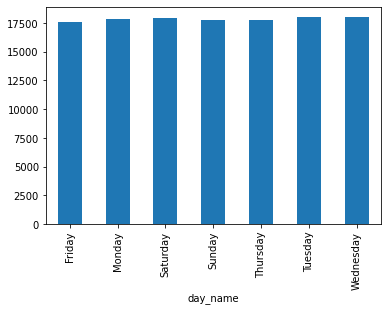

In [51]:
#2.Create the bar plot that shows the count of transactions per day of the week.

txn.groupby('day_name')['customer_id'].count().plot.bar()

In [52]:
#3. Following the same logic as in section 1.2, generate the features that capture the count
#of transactions per client, year and day of the week. The intermediate MultiIndex
#dataframe (with nlevels=3) and the final pivoted output with a single index are shown
#in the snapshots below.

Year_day_of_week_counts = txn.groupby(['customer_id', 'day_name', 'YEAR'])['tran_amount'].count()
Year_day_of_week_counts=pd.DataFrame(Year_day_of_week_counts) 
Year_day_of_week_counts.columns=["cnt"]
Year_day_of_week_counts_pivot=Year_day_of_week_counts.pivot_table(index = 'customer_id',columns=['YEAR','day_name']).fillna(0).astype(int)
Year_day_of_week_counts_pivot

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996           0      1        0      0        0       1         0      0   
CS8997           0      0        0      0        1       0         1      1   
CS8998           0      0        0      0        0       1         1      2   
CS8999           0      1        1      0        0       1         0      1   
CS9000           0      0        0      2        0       0         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996           0        3  ...        1       1         2      0      0   
CS8997           2        0  ...        0       0         0      0      0   
CS8998           0        0  ...        0       1         1      0      0   
CS8999           0        2  ...        0       0         2      0      0   
CS9000           0        1  ...        1       1         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  
...              ...    ...      ...     ...       ...  
CS8996             0      0        0       0         0  
CS8997             0      0        0       0         0  
CS8998             0      0        0       0         0  
CS8999             0      0        0       0         0  
CS9000             1      0        0       0         0  

[6889 rows x 35 columns]

In [53]:
#As in section 1.2, we need to extract the column names of level 0, level 1 and level 2, and then combine the names of three levels into one name.
level_0 = Year_day_of_week_counts_pivot.columns.get_level_values(0).astype(str)
level_1 = Year_day_of_week_counts_pivot.columns.get_level_values(1).astype(str)
level_2 = Year_day_of_week_counts_pivot.columns.get_level_values(2).astype(str)
Year_day_of_week_counts_pivot.columns = level_0 + '_' + level_1 + '_' + level_2
Year_day_of_week_counts_pivot

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0,1,0,0,0,1,0,0,0,3,...,1,1,2,0,0,0,0,0,0,0
CS8997,0,0,0,0,1,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
CS8998,0,0,0,0,0,1,1,2,0,0,...,0,1,1,0,0,0,0,0,0,0


In [54]:
#4. Confirm that your output has the same number of rows as the final output in section 1.2
#and save it as annual day of week counts pivot.xlsx. How many features/columns
#did you create in this section?

Year_day_of_week_counts_pivot.to_excel("annual_day_of_week_counts_pivot.xlsx")
files.download('annual_day_of_week_counts_pivot.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Answer: The output contains 6889 rows, which is the same as the final output in section 1.2. There are 35 features in this section

In [55]:
#5. Similarly, generate the features that capture the count of transactions per client,
#month-end-date and day of the week. In contrast with the annual pivot table in
#the previous step, here you want to create the pivot with [’customer id’, ’ME DT’] as
#index to obtain the following output dataframe.

month_end_date_counts=txn.groupby(["customer_id" ,"ME_DT","day_name"]).count()["tran_amount"]
month_end_date_counts=pd.DataFrame(month_end_date_counts)
month_end_date_counts.columns=["cnt"]
month_end_date_counts_pivot=month_end_date_counts.pivot_table(index=['customer_id','ME_DT'],columns=["day_name"]).fillna(0).astype(int)

#extract the column names of level 0, level 1  and then combine the names of two levels into one name.
level_0 = month_end_date_counts_pivot.columns.get_level_values(0).astype(str)
level_1 = month_end_date_counts_pivot.columns.get_level_values(1).astype(str)
month_end_date_counts_pivot.columns = level_0 + '_' + level_1
month_end_date_counts_pivot

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   
...                            ...         ...           ...         ...   
CS9000      2014-01-31           0           0             0           1   
            2014-05-31           0           0             0           0   
            2014-07-31           0           0             0           0   
            2014-08-31           0           0             0           1   
            2015-02-28           0           0             1           0   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0  
...                              ...          ...            ...  
CS9000      2014-01-31             0            0              0  
            2014-05-31             1            0              0  
            2014-07-31             0            1              0  
            2014-08-31             0            0              0  
            2015-02-28             0            0              0  

[103234 rows x 7 columns]

In [56]:
#6. Join with base table pd as you did in section 1.5 and impute with your choice of
#value for NaN. Save the final output as mth day counts.xlxs.

mth_day_counts = base_table_pd.join(month_end_date_counts_pivot, on=['CLNT_NO','ME_DT'], how='left').fillna(0)
mth_day_counts.to_excel("mth_day_counts.xlsx")
files.download('mth_day_counts.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **1.7 Date-related features: days since last transaction**

In [69]:
#1.The starting point is again the txn table. Recall that most clients have a single
#purchase per month, but some clients have multiple purchases in a month. Since
#you want to calculate the ”days since last transaction”, you want to capture the last
#transaction in a month for every client.

#Use the appropriate groupby to create the table last monthly purchase that cap-
#tures the last ’txn date’ (aggfunc=max) for every client and month.

last_monthly_purchase=txn.groupby(['customer_id','ME_DT']).agg(
    last_monthly_purchase = pd.NamedAgg('txn_date','max')
)

In [70]:
#2.Join base table pd with last monthly purchase as you did in section 1.5. The
#snapshot below shows the output of the created object last monthly purchase base
#for client CS1112 who made her/his first purchase on June 2011, then no purchase on
#July and made a purchase again on August 2011. What values will you use to impute
#the NaT values here? NaT stands for ”Not a Timestamp”.

last_monthly_purchase_base=base_table_pd.join(last_monthly_purchase, on = ['CLNT_NO', 'ME_DT'], how = 'left')
last_monthly_purchase_base.sort_values(['CLNT_NO','ME_DT'], ascending = True, inplace = True)


In [71]:
last_monthly_purchase_base[last_monthly_purchase_base.CLNT_NO=="CS1112"]

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT
157048,CS1112,2011-10-31,2011-10-02
157029,CS1112,2011-11-30,NaT
157049,CS1112,2011-12-31,NaT
157046,CS1112,2012-01-31,NaT
157032,CS1112,2012-02-29,NaT


Answer: Possibly we could use the average date number of the other months of this customer to fill in the NaT values

In [74]:
#3.To answer the imputation problem, we have to think what value should we use for say
#July 2011 for ’last monthly purchase’ ? The answer is that in July the value for the
#last monthly purchase is the previous line value: 2011-06-15. In other words, for every
#client we want to forward-fill the NaT values.

last_monthly_purchase_base=last_monthly_purchase_base.groupby(['CLNT_NO']).apply(lambda x: x.ffill())
last_monthly_purchase_base[last_monthly_purchase_base.CLNT_NO=="CS1113"]

,CLNT_NO,ME_DT,last_monthly_purchase
160025,CS1113,2011-05-31,2011-05-27
160019,CS1113,2011-06-30,2011-05-27
160005,CS1113,2011-07-31,2011-07-25
160030,CS1113,2011-08-31,2011-07-25
160021,CS1113,2011-09-30,2011-07-25
160009,CS1113,2011-10-31,2011-10-23
159990,CS1113,2011-11-30,2011-10-23
160010,CS1113,2011-12-31,2011-10-23
160007,CS1113,2012-01-31,2011-10-23
159993,CS1113,2012-02-29,2011-10-23


In [75]:
last_monthly_purchase_base[last_monthly_purchase_base.CLNT_NO=="CS1114"]

,CLNT_NO,ME_DT,last_monthly_purchase
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24
101130,CS1114,2011-09-30,2011-09-19
101118,CS1114,2011-10-31,2011-09-19
101099,CS1114,2011-11-30,2011-09-19
101119,CS1114,2011-12-31,2011-09-19
101116,CS1114,2012-01-31,2011-09-19
101102,CS1114,2012-02-29,2011-09-19


In [76]:
#4. Subtract the two date columns and convert the output to .dt.days to calculate the
#column ’days since last txn’ as shown in the following snapshot.

last_monthly_purchase_base['days_since_last_txn'] = (last_monthly_purchase_base['ME_DT'] - last_monthly_purchase_base['last_monthly_purchase']).dt.days
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
295140,CS9000,2014-11-30,2014-08-24,98.0
295126,CS9000,2014-12-31,2014-08-24,129.0
295119,CS9000,2015-01-31,2014-08-24,160.0
295136,CS9000,2015-02-28,2015-02-28,0.0


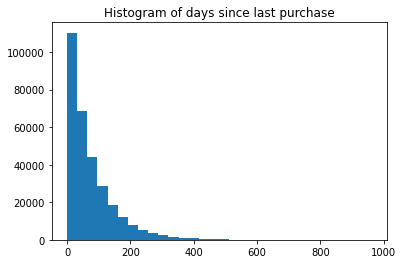

In [77]:
#5.Plot a histogram of the ’days since last txn’. Based on the values you observe in the
#histogram, impute the remaining NaN values (i.e. for the initial months before a client
#makes a purchase). Save the columns [’CLNT NO’, ’ME DT’, ’days since last txn’] as
#days since last txn.xlsx.

plt.hist(last_monthly_purchase_base['days_since_last_txn'], bins = 30)
plt.title("Histogram of days since last purchase")
plt.show()

In [81]:
#I choose to impute the NaN values with average of the rest data of days since last transaction

last_monthly_purchase_base.days_since_last_txn = last_monthly_purchase_base.days_since_last_txn.fillna(last_monthly_purchase_base.days_since_last_txn.mean())
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,74.78425
157058,CS1112,2011-06-30,2011-06-15,15.00000
157044,CS1112,2011-07-31,2011-06-15,46.00000
157069,CS1112,2011-08-31,2011-08-19,12.00000
157060,CS1112,2011-09-30,2011-08-19,42.00000
...,...,...,...,...
295140,CS9000,2014-11-30,2014-08-24,98.00000
295126,CS9000,2014-12-31,2014-08-24,129.00000
295119,CS9000,2015-01-31,2014-08-24,160.00000
295136,CS9000,2015-02-28,2015-02-28,0.00000


In [82]:
last_monthly_purchase_base[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel("days_since_last_txn.xlsx")
files.download('days_since_last_txn.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>